# PUBG EDA analysis, Feature Engineering and Accuracy Test

## Since I am not that good in PUBg, I thought that I would make a guide to win at the game.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the data file

In [2]:
df=pd.read_csv('train_V2.csv')

In [3]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.columns.to_list()

['Id',
 'groupId',
 'matchId',
 'assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'matchDuration',
 'matchType',
 'maxPlace',
 'numGroups',
 'rankPoints',
 'revives',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints',
 'winPlacePerc']

# Longest Kill

### Now, I am trying to analyze the Longest Kill. If the person is able to shoot a sniper and a long distance kill, he would be able a good player with some experience

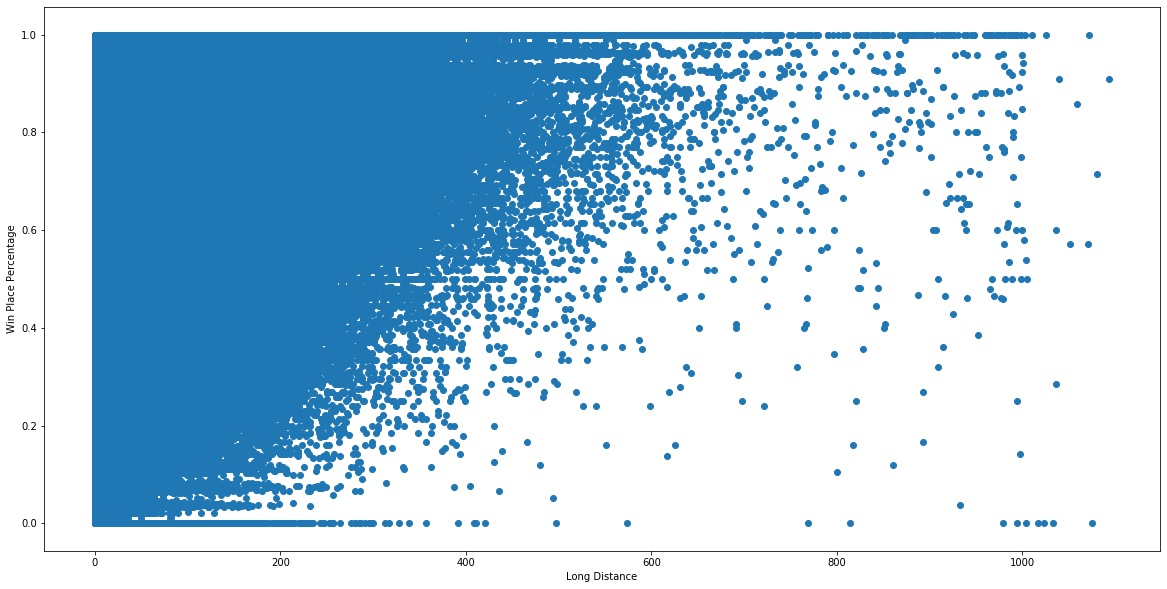

In [7]:
plt.subplots(figsize=(20,10))
plt.xlabel('Long Distance')
plt.ylabel('Win Place Percentage')
plt.scatter(df['longestKill'],df['winPlacePerc'])

### As we can see, that longest kill has a good correlation with winning

In [8]:
print(df['longestKill'].quantile(0.99))

243.8


In [9]:
print(df['longestKill'].max())

1094.0


In [10]:
longestkill=df.copy()

In [11]:
longestkill['categories']=pd.cut(longestkill['longestKill'],[-1,0,10,50,100,200,250,1100],labels=['0 distance','0-10 distance','10-50 distance','50-100 distance','100-200 distance','200-250 distance','250-1100 distance'])

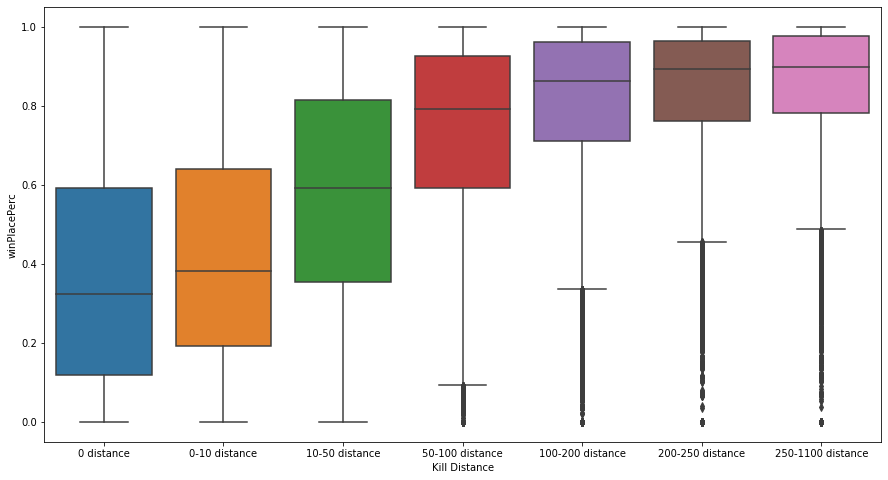

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(x="categories", y="winPlacePerc", data=longestkill)
plt.xlabel('Kill Distance')
plt.show()

### From the boxplot, we can further conclude that long distance kills makes a person proficient with winning. Need to start honing those sniper skills. 

# Killing 


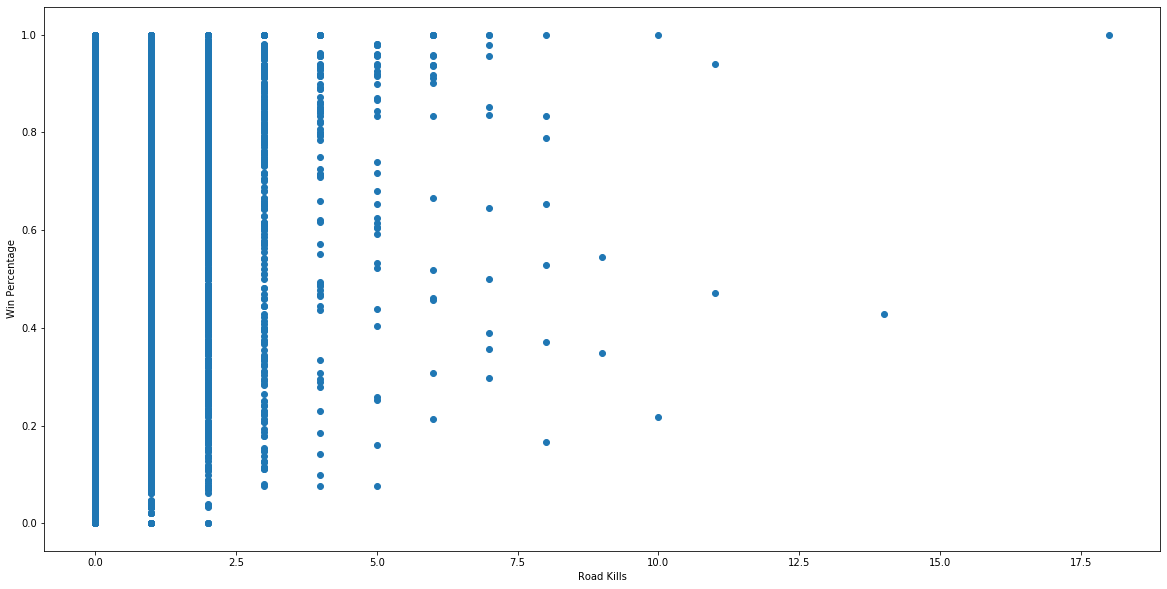

In [13]:
plt.subplots(figsize=(20,10))
plt.scatter(df['roadKills'],df['winPlacePerc'])
plt.ylabel('Win Percentage')
plt.xlabel('Road Kills')
plt.show()

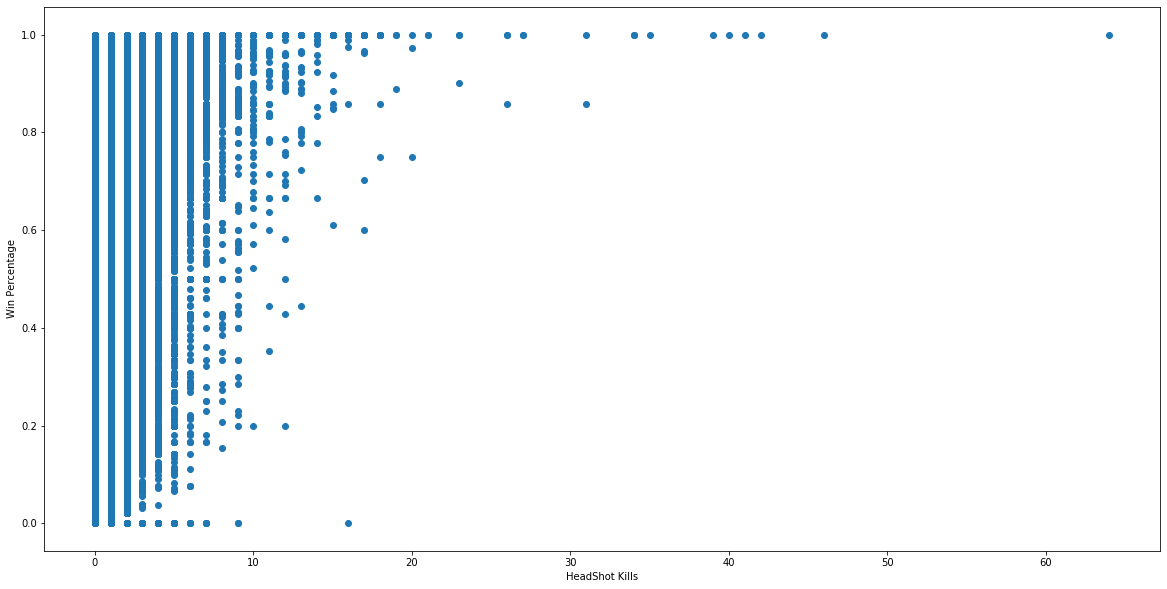

In [14]:
plt.subplots(figsize=(20,10))
plt.scatter(df['headshotKills'],df['winPlacePerc'])
plt.xlabel('HeadShot Kills')
plt.ylabel('Win Percentage')
plt.show()

### Since head-shot kills and road kills are given, I am creating another column for body shot kills as they are the only one left 

In [15]:
df['bodyshotkills']=df['kills']-df['headshotKills']-df['roadKills']

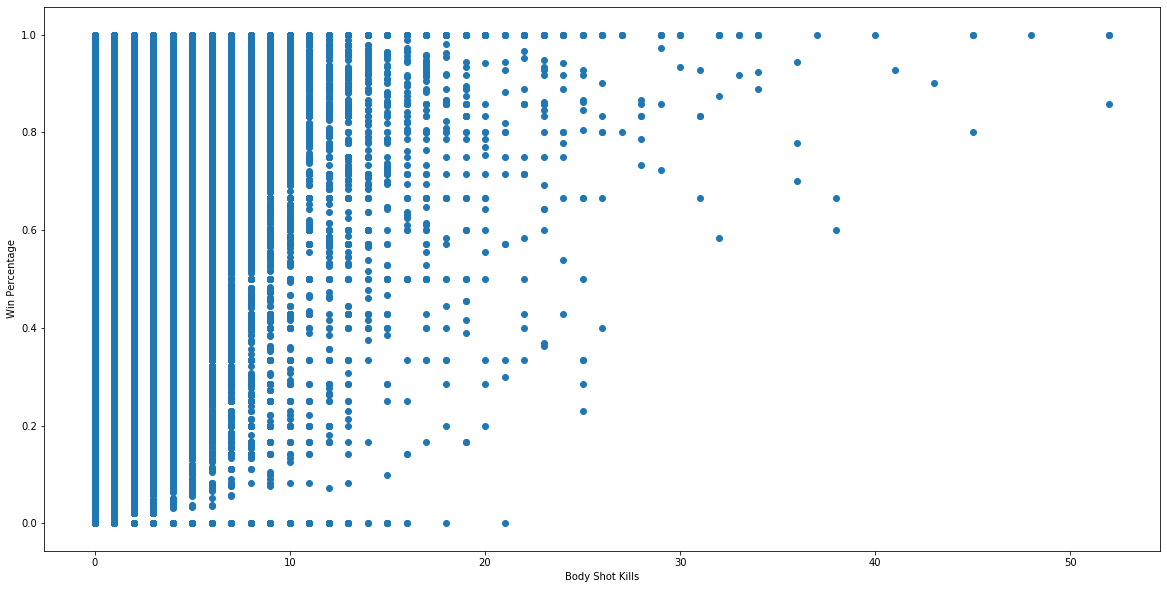

In [16]:
plt.subplots(figsize=(20,10))
plt.scatter(df['bodyshotkills'],df['winPlacePerc'])
plt.xlabel('Body Shot Kills')
plt.ylabel('Win Percentage')
plt.show()

### DBNOs are basically knocked out players but they are not counted as kills, since the player might have been revived. 
### So let us add them in the total kills as it would help us to gauge the skill of the player as well

In [17]:
df['knockedandkilled']=df['DBNOs']+df['kills']

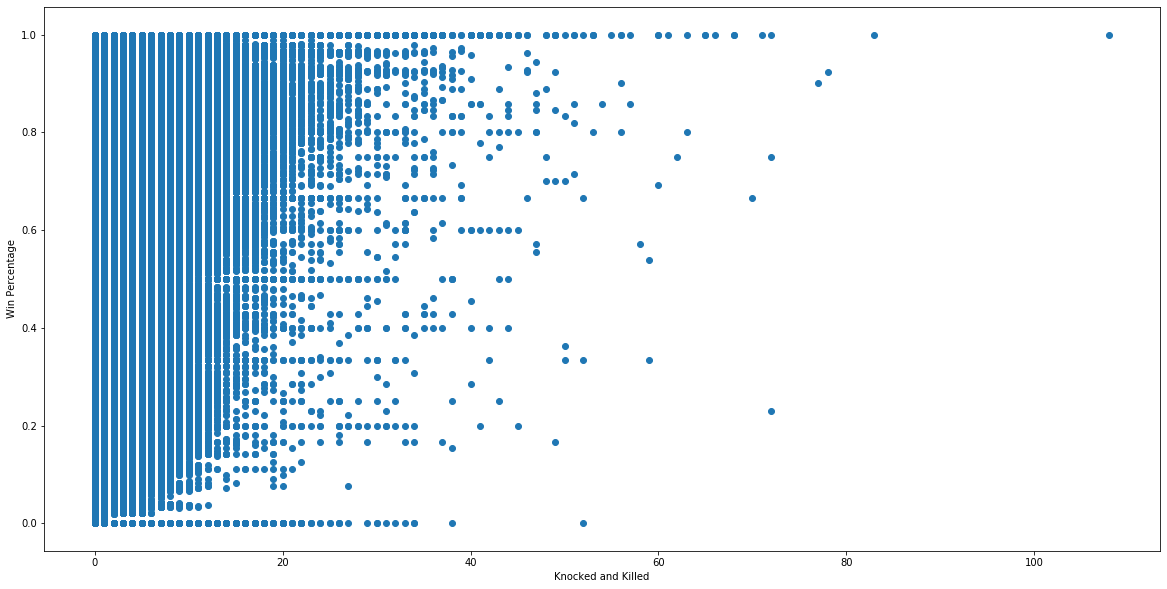

In [18]:
plt.subplots(figsize=(20,10))
plt.scatter(df['knockedandkilled'],df['winPlacePerc'])
plt.xlabel('Knocked and Killed')
plt.ylabel('Win Percentage')
plt.show()

# Distance

In [19]:
data = df.copy()
data = data[data['walkDistance'] < df['walkDistance'].quantile(0.99)]

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4402459 entries, 0 to 4446965
Data columns (total 31 columns):
Id                  object
groupId             object
matchId             object
assists             int64
boosts              int64
damageDealt         float64
DBNOs               int64
headshotKills       int64
heals               int64
killPlace           int64
killPoints          int64
kills               int64
killStreaks         int64
longestKill         float64
matchDuration       int64
matchType           object
maxPlace            int64
numGroups           int64
rankPoints          int64
revives             int64
rideDistance        float64
roadKills           int64
swimDistance        float64
teamKills           int64
vehicleDestroys     int64
walkDistance        float64
weaponsAcquired     int64
winPoints           int64
winPlacePerc        float64
bodyshotkills       int64
knockedandkilled    int64
dtypes: float64(6), int64(21), object(4)
memory usage: 1.0+ GB


In [21]:
df['totaldistance']=df['walkDistance']+df['swimDistance']+df['rideDistance']

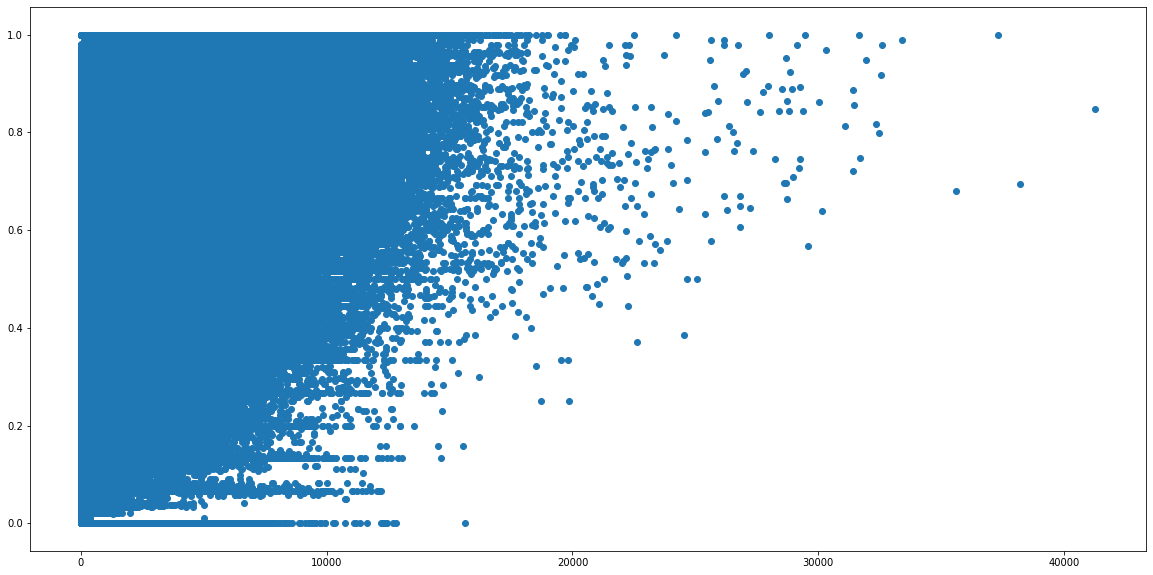

In [22]:
plt.subplots(figsize=(20,10))
plt.scatter(df['totaldistance'],df.winPlacePerc)

### Pretty nice 

In [23]:
df['totaldistance'].quantile(0.99)

9309.0

In [24]:
df['totaldistance'].max()

41270.1

In [25]:
totaldistance=df.copy()

In [26]:
totaldistance['categories']=pd.cut(totaldistance['totaldistance'],[-1,0,100,500,1000,2000,8000,16000], labels=['0-100 distance', '100-500 distance','500-1000 distance', '1000-2000 distance', '2000-8000 distance', '8000-1600 distance', '>16000 distance'])

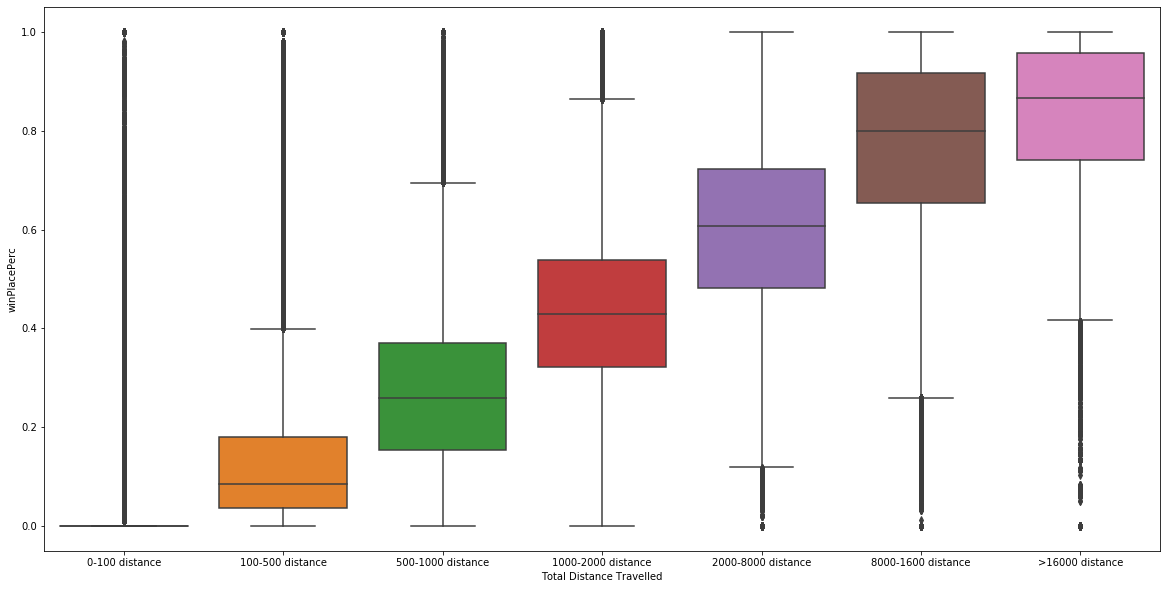

In [27]:
plt.subplots(figsize=(20,10))
sns.boxplot(x=totaldistance['categories'],y=totaldistance['winPlacePerc'])
plt.xlabel('Total Distance Travelled')
plt.show()

# Now, let us look at the people who travelled a total distance of 0 in the game

In [28]:
distance0=df[df['totaldistance']==0].copy()

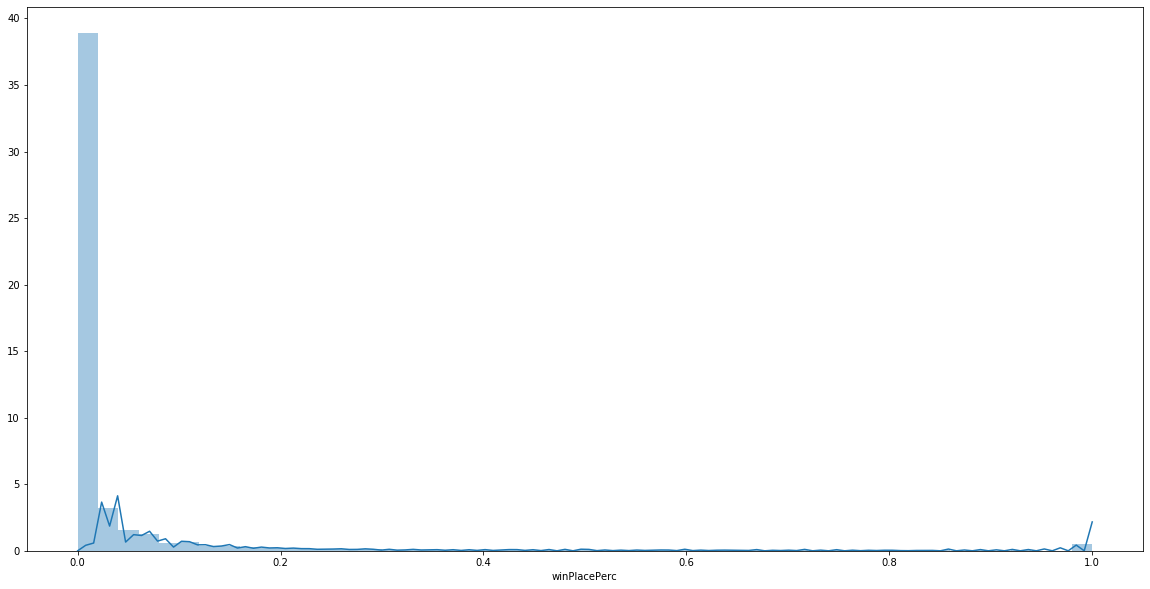

In [29]:
fig,ax=plt.subplots(figsize=(20,10))
sns.distplot(distance0.winPlacePerc)

### From the above graphs we can see that even though the majority of the players have 0.0 win place percentage, there are some players who have a win percentage of 1.0 

### Now let us look at the champs, who travelled a distance of 0, had a winning percentage of 1.0 and had kills that are zero

In [30]:
distance0=distance0[distance0['winPlacePerc']==1.0]

In [31]:
distance0=distance0[distance0['kills']==0]

In [32]:
distance0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 3702 to 4446093
Data columns (total 32 columns):
Id                  797 non-null object
groupId             797 non-null object
matchId             797 non-null object
assists             797 non-null int64
boosts              797 non-null int64
damageDealt         797 non-null float64
DBNOs               797 non-null int64
headshotKills       797 non-null int64
heals               797 non-null int64
killPlace           797 non-null int64
killPoints          797 non-null int64
kills               797 non-null int64
killStreaks         797 non-null int64
longestKill         797 non-null float64
matchDuration       797 non-null int64
matchType           797 non-null object
maxPlace            797 non-null int64
numGroups           797 non-null int64
rankPoints          797 non-null int64
revives             797 non-null int64
rideDistance        797 non-null float64
roadKills           797 non-null int64
swimDistance        

### Here are these 797 cheaters who are probably using some mod, which is a good way to win, but since they are so less and people want to genuinely become good, they should not be following this path

### Two graphs to show the comparison between cheaters and normal players in the game lobby 

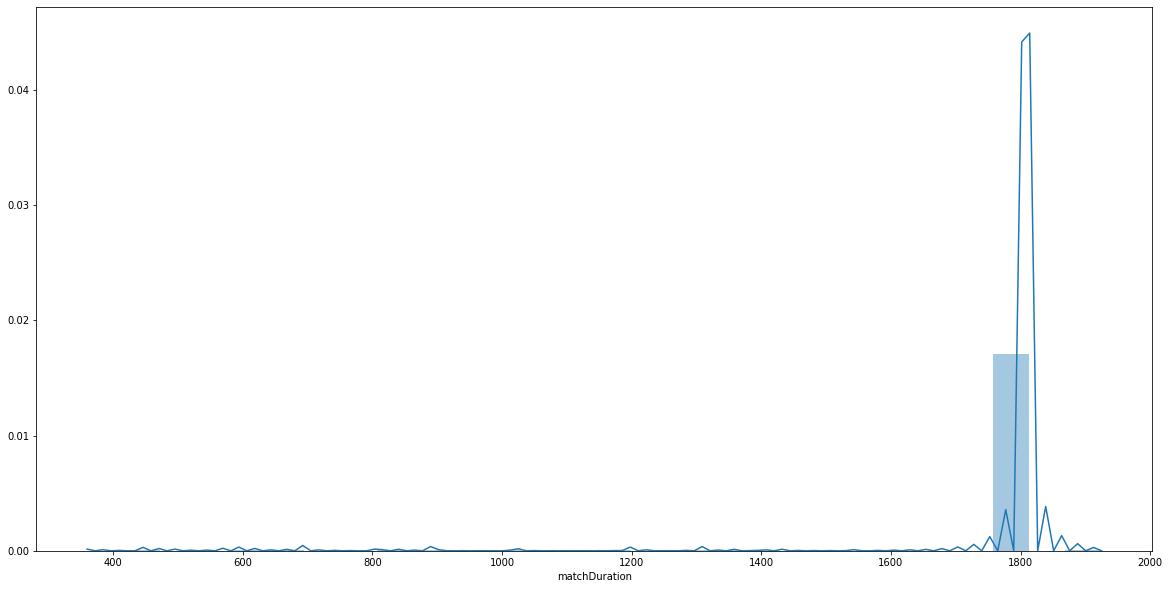

In [33]:
fig,ax=plt.subplots(figsize=(20,10))
sns.distplot(distance0['matchDuration'])

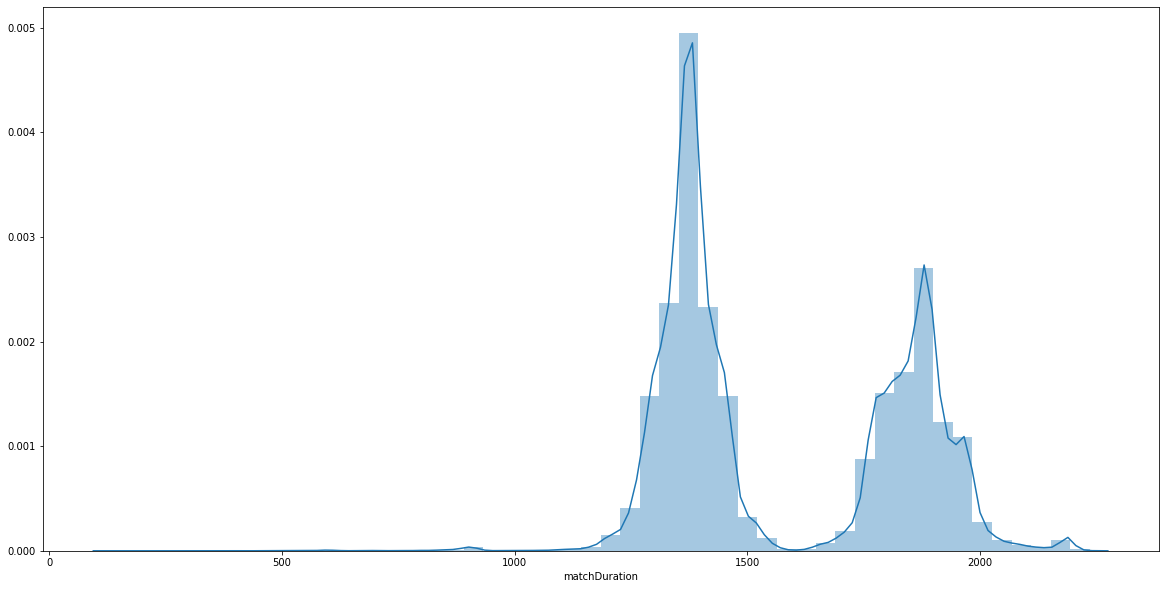

In [34]:
fig,ax=plt.subplots(figsize=(20,10))
sns.distplot(df['matchDuration'])

# Weapons

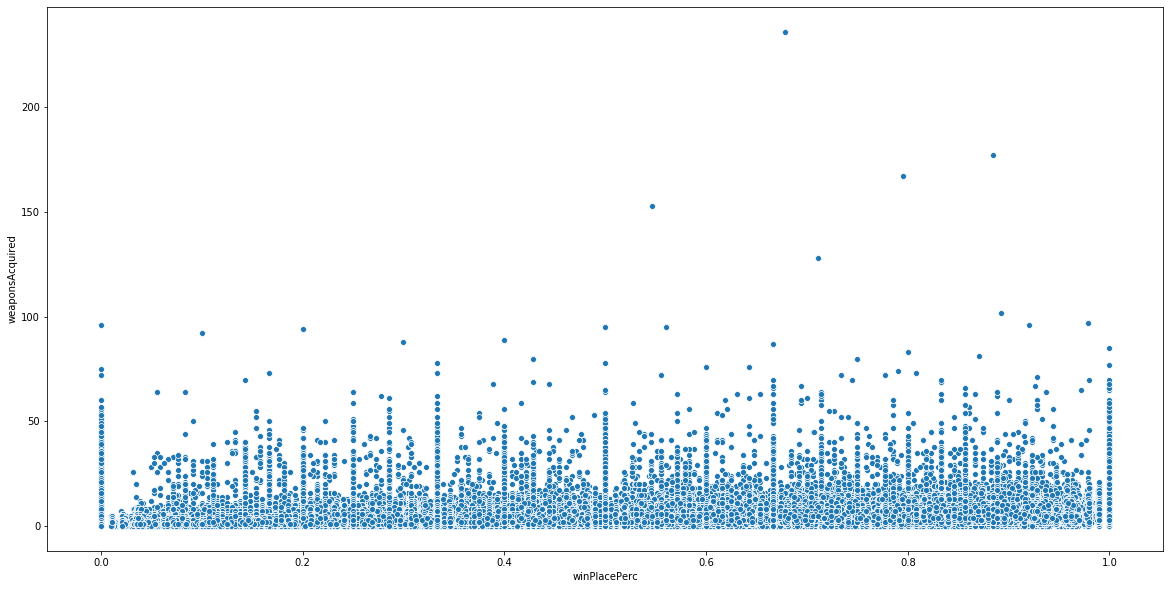

In [35]:
plt.subplots(figsize=(20,10))
sns.scatterplot(df.winPlacePerc,df.weaponsAcquired)

#### Not that great of a correlation for study

### Now, I want to see how the weapons that are acquired have an effect on the kills

In [36]:
df['kills/weaponacquired']=df['kills']/(df['weaponsAcquired']+1)

In [37]:
df['kills/weaponacquired'].quantile(0.99)

1.3333333333333333

In [38]:
df['kills/weaponacquired'].mean()

0.1868252305517025

In [39]:
df['kills/weaponacquired'].max()

14.0

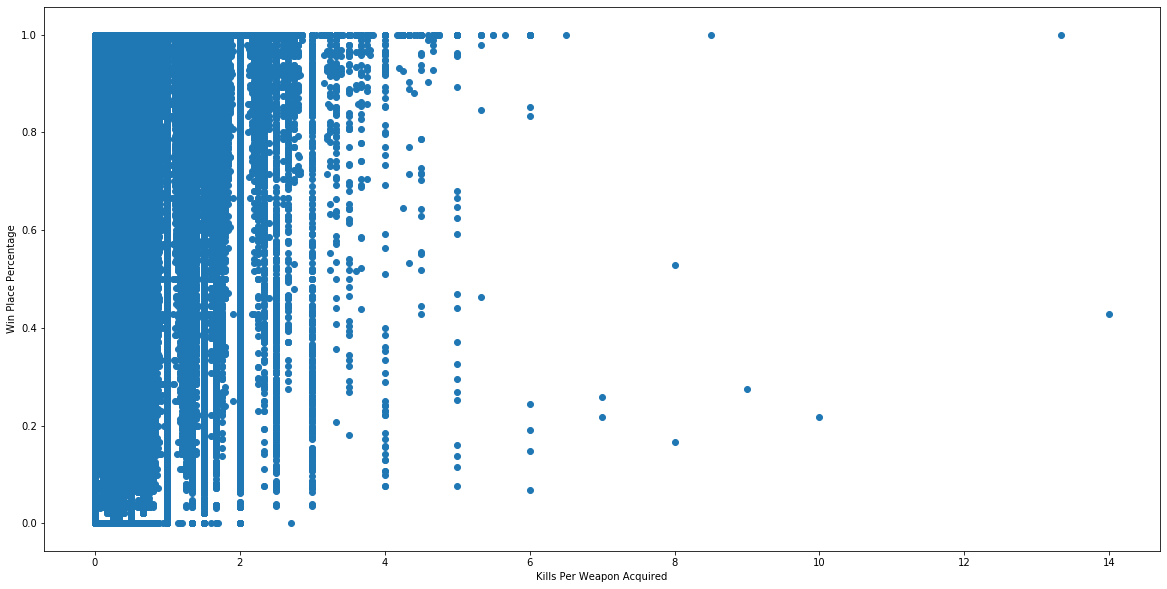

In [40]:
plt.subplots(figsize=(20,10))
plt.scatter(df['kills/weaponacquired'],df.winPlacePerc)
plt.xlabel('Kills Per Weapon Acquired')
plt.ylabel('Win Place Percentage')
plt.show()

In [41]:
df_1=df.copy()

In [42]:
df_2=df.corr()

## Which Game Mode to play and in which setting so that a person would win!!!

In [43]:
df_matchtype=df.set_index('matchType')

In [44]:
df.columns.to_list()

['Id',
 'groupId',
 'matchId',
 'assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'matchDuration',
 'matchType',
 'maxPlace',
 'numGroups',
 'rankPoints',
 'revives',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints',
 'winPlacePerc',
 'bodyshotkills',
 'knockedandkilled',
 'totaldistance',
 'kills/weaponacquired']

In [45]:
teams=pd.DataFrame(df.iloc[:,[3,4,6,7,8,10,11,13,15,21,23,24]].groupby('matchType').sum())

In [46]:
teams

,assists,boosts,DBNOs,headshotKills,heals,killPoints,kills,longestKill,roadKills,teamKills,vehicleDestroys
matchType,,,,,,,,,,,
crashfpp,1206,7112,2847,475,7590,0,4898,2.810565e+04,1967,460,491
crashtpp,90,410,178,21,349,0,327,2.055510e+03,136,14,25
duo,67007,355451,191464,66662,419895,138966019,284730,6.964864e+06,1336,8212,3271
duo-fpp,215092,1074455,626514,224264,1324426,484040959,923022,2.230166e+07,2013,19305,5833
flarefpp,200,945,640,147,1318,0,636,1.803084e+04,6,32,16
flaretpp,712,3418,2147,481,4611,284000,2148,6.661883e+04,27,137,78
normal-duo,230,214,489,184,549,132000,762,1.061151e+04,6,7,4
normal-duo-fpp,3346,9270,4815,2596,12654,3696000,10737,2.120699e+05,53,116,97
normal-solo,569,264,0,626,804,221000,2448,2.734091e+04,0,24,0


In [47]:
winplaceperc=pd.DataFrame(df.loc[:,['winPlacePerc','matchType']].groupby('matchType').mean())

In [48]:
winplaceperc

,winPlacePerc
matchType,
crashfpp,0.474711
crashtpp,0.484515
duo,0.482777
duo-fpp,0.485801
flarefpp,0.451455
flaretpp,0.434591
normal-duo,0.514656
normal-duo-fpp,0.508175
normal-solo,0.561912


In [49]:
df_4=pd.concat([teams,winplaceperc],axis=1)

In [50]:
df_4

,assists,boosts,DBNOs,headshotKills,heals,killPoints,kills,longestKill,roadKills,teamKills,vehicleDestroys,winPlacePerc
matchType,,,,,,,,,,,,
crashfpp,1206,7112,2847,475,7590,0,4898,2.810565e+04,1967,460,491,0.474711
crashtpp,90,410,178,21,349,0,327,2.055510e+03,136,14,25,0.484515
duo,67007,355451,191464,66662,419895,138966019,284730,6.964864e+06,1336,8212,3271,0.482777
duo-fpp,215092,1074455,626514,224264,1324426,484040959,923022,2.230166e+07,2013,19305,5833,0.485801
flarefpp,200,945,640,147,1318,0,636,1.803084e+04,6,32,16,0.451455
flaretpp,712,3418,2147,481,4611,284000,2148,6.661883e+04,27,137,78,0.434591
normal-duo,230,214,489,184,549,132000,762,1.061151e+04,6,7,4,0.514656
normal-duo-fpp,3346,9270,4815,2596,12654,3696000,10737,2.120699e+05,53,116,97,0.508175
normal-solo,569,264,0,626,804,221000,2448,2.734091e+04,0,24,0,0.561912


In [51]:
df_4=df_4.loc[['solo', 'duo', 'squad', 'solo-fpp', 'duo-fpp', 'squad-fpp'],:]

In [52]:
df_4.sort_values('winPlacePerc',ascending=False)

,assists,boosts,DBNOs,headshotKills,heals,killPoints,kills,longestKill,roadKills,teamKills,vehicleDestroys,winPlacePerc
matchType,,,,,,,,,,,,
solo-fpp,30939,568419,0,135024,541956,247259966,501727,1.164830e+07,1872,5466,1878,0.491835
duo-fpp,215092,1074455,626514,224264,1324426,484040959,923022,2.230166e+07,2013,19305,5833,0.485801
duo,67007,355451,191464,66662,419895,138966019,284730,6.964864e+06,1336,8212,3271,0.482777
solo,10119,193960,0,40723,184150,74203632,158460,3.766123e+06,1810,2728,1370,0.473814
squad-fpp,504455,1945842,1532827,387495,2593509,977569121,1595294,4.102296e+07,3455,47274,13637,0.464764
squad,181624,736443,535086,132869,945087,311160002,558503,1.504727e+07,2794,21298,7919,0.451908


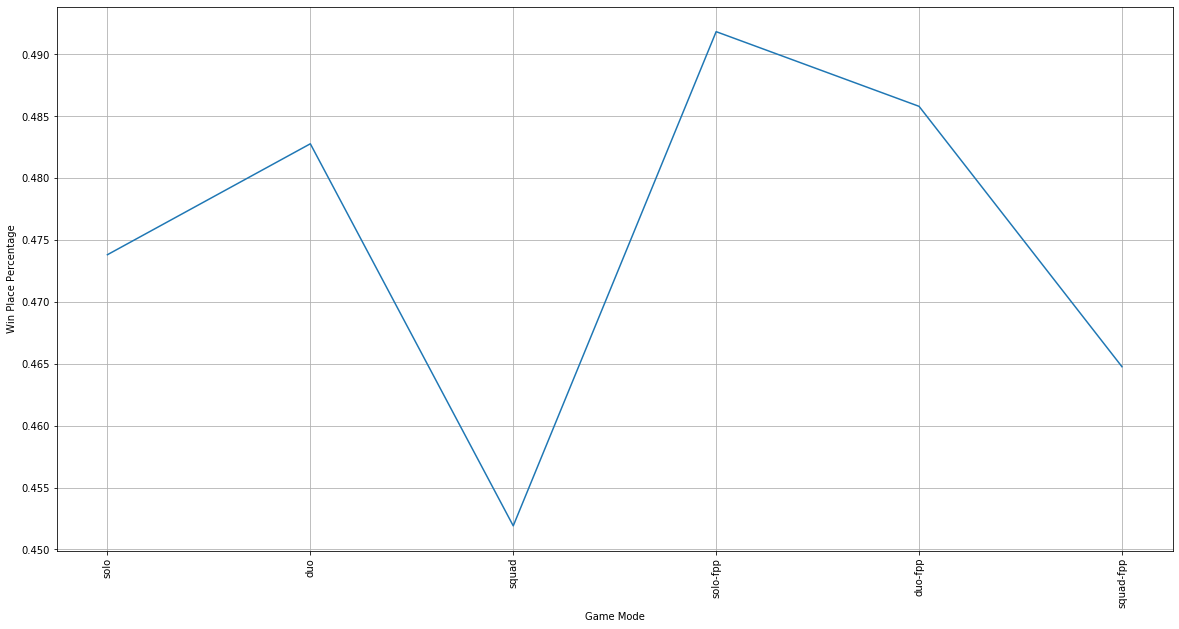

In [53]:
_,_ = plt.subplots(figsize=(20,10))
plt.grid()
plt.xticks(rotation=90)
plt.xlabel('Game Mode')
plt.ylabel('Win Place Percentage')
plt.plot(df_4.winPlacePerc)

### SOLO game mode is the most ideal way to win

###  A player should play in First person shooter setting to win at the game

## Medic class in PUBG

In [54]:
medical=pd.concat([df.boosts,df.heals,df.assists],axis=1)

In [55]:
plt.text??

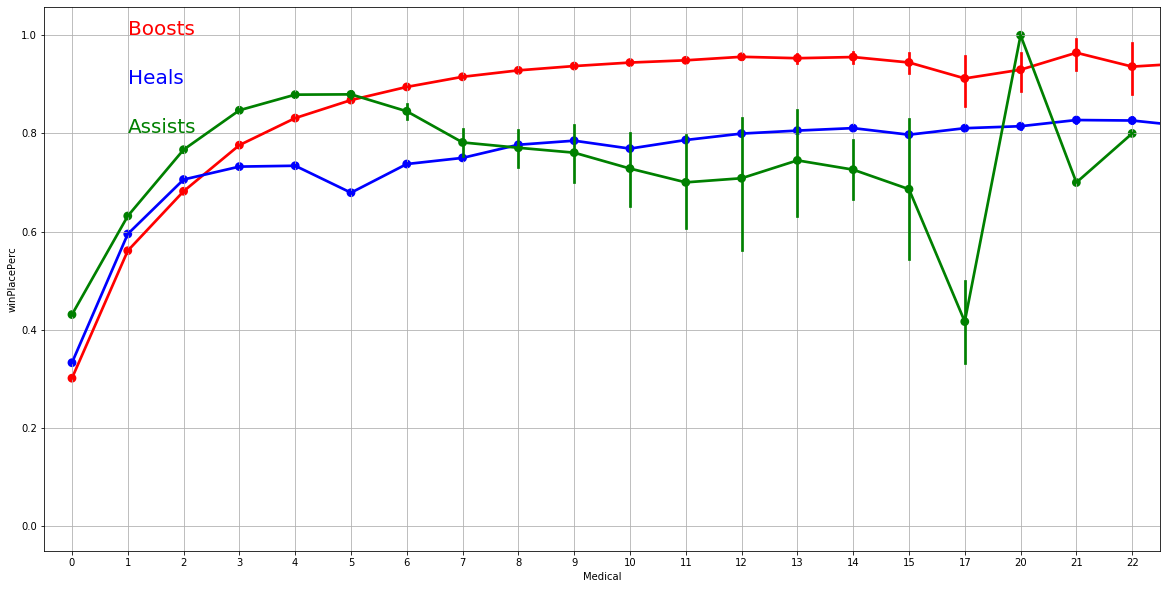

In [56]:
_,_=plt.subplots(figsize=(20,10))
sns.pointplot(x=df['boosts'],y=df.winPlacePerc,color='red')
sns.pointplot(x=df['heals'],y=df.winPlacePerc,color='blue')
sns.pointplot(x=df['assists'],y=df.winPlacePerc,color='green')
plt.text(1,1,'Boosts',color='red',fontsize=20)
plt.text(1,0.9,'Heals',color='blue',fontsize=20)
plt.text(1,0.8,'Assists',color='green',fontsize=20)
plt.xlabel('Medical')
plt.grid()
plt.show()

In [57]:
df['medical']=df['assists']+df['boosts']+df['heals']

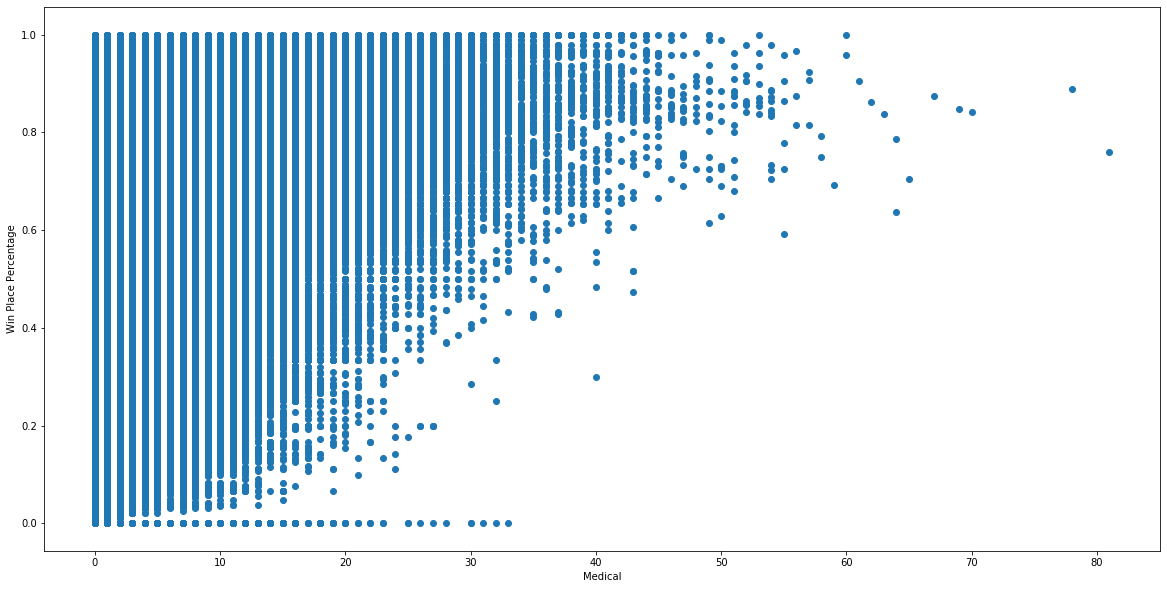

In [58]:
plt.subplots(figsize=(20,10))
plt.scatter(df['medical'],df['winPlacePerc'])
plt.xlabel('Medical')
plt.ylabel('Win Place Percentage')
plt.show()

# Heatmap

In [59]:
corr = df.corr()

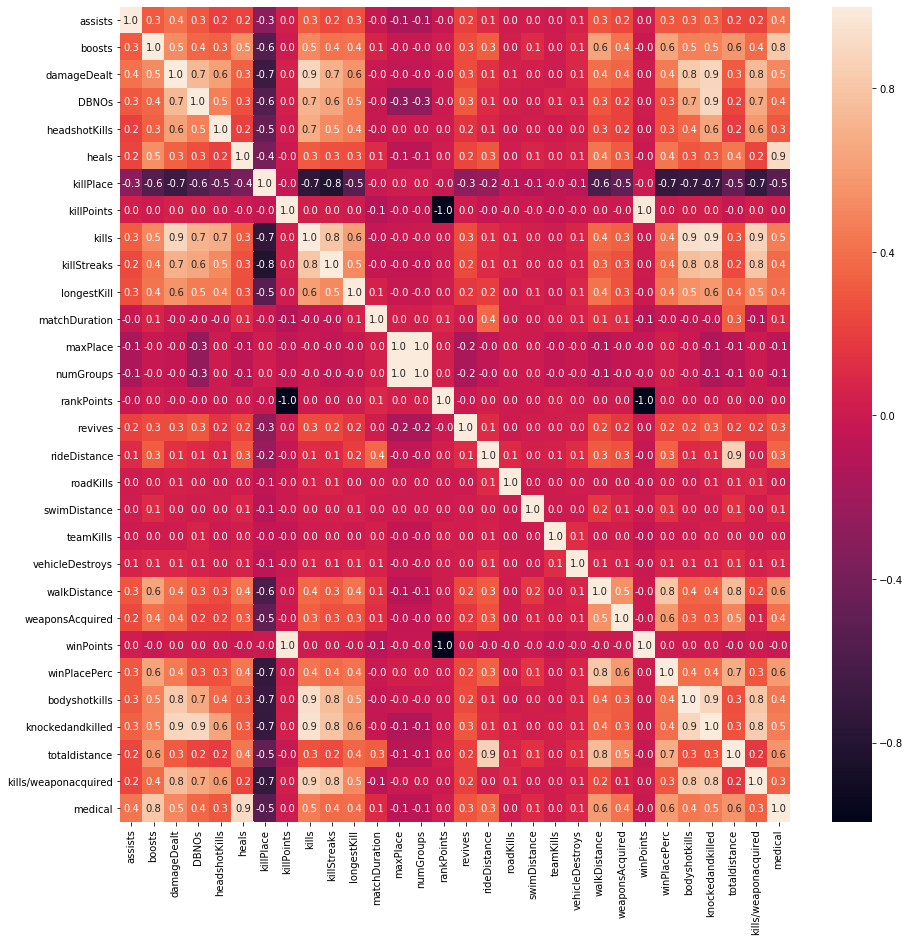

In [60]:
fig, ax = plt.subplots(figsize=(15,15)) 
df_corr=df.corr()

sns.heatmap(df_corr, fmt= '.1f', annot=True,ax=ax)

In [61]:
cols = df.corr().nlargest(5, 'winPlacePerc')['winPlacePerc'].index

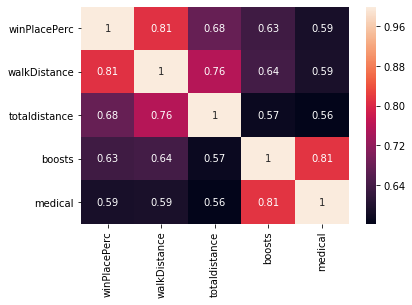

In [62]:
sns.heatmap(np.corrcoef(df[cols].values.T),annot=True, xticklabels=cols.values, yticklabels=cols.values)

## After some EDA, let us now look how well the model predicts

(array([265729., 154700., 116546.,  84871., 142621., 128986., 101234.,
        112417., 124391.,  89087., 127109., 121411., 101488., 111223.,
         97458., 100170., 110859., 111940.,  84839.,  78001., 132112.,
         82085., 106618., 102412.,  81238.,  99594., 100769.,  94545.,
        103873.,  82875., 106831.,  92262., 112117.,  87947., 100228.,
        127148.,  77576.,  98974., 123193., 169488.]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   ]),
 <a list of 40 Patch objects>)

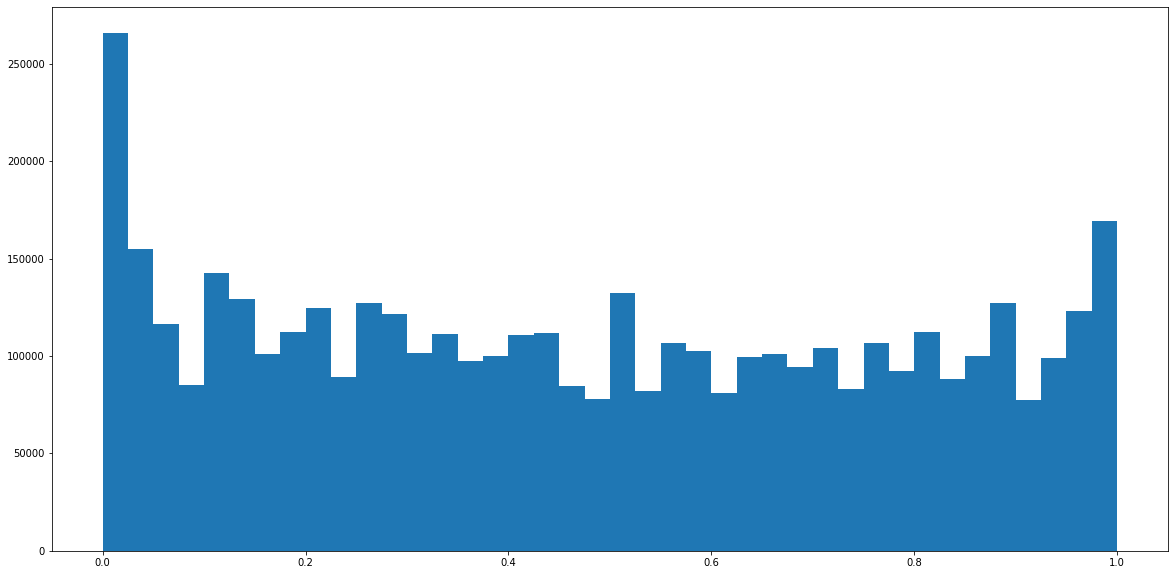

In [63]:
plt.subplots(figsize=(20,10))
plt.hist(df.winPlacePerc,bins=40)

In [64]:
print(df.winPlacePerc.skew())
print(df.winPlacePerc.kurt())

0.09882962751279736
-1.245390428241101


##  Pretty good skewness, no need to change

In [65]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

In [66]:
X=df.loc[:,'assists':'medical']
X=X.drop(['winPlacePerc'],axis=1)

In [67]:
X=pd.concat([X,pd.get_dummies(X['matchType'])],axis=1)

In [68]:
X.drop('matchType',axis=1,inplace=True)

## Standardize the Features

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()

In [71]:
for i in X.columns:
    if X[i].dtypes=='float64' or X[i].dtypes=='int64':
        X[[i]]=scaler.fit_transform(X[[i]])

In [72]:
X.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,bodyshotkills,knockedandkilled,totaldistance,kills/weaponacquired,medical,crashfpp,crashtpp,duo,duo-fpp,flarefpp,flaretpp,normal-duo,normal-duo-fpp,normal-solo,normal-solo-fpp,normal-squad,normal-squad-fpp,solo,solo-fpp,squad,squad-fpp
0,-0.397257,-0.645129,-0.765410,-0.574191,-0.37668,-0.511252,0.451541,1.172889,-0.593402,-0.765087,-0.451176,-1.057077,-0.692656,-0.730270,-1.212262,-0.34873,-0.404524,-0.047648,-0.147836,-0.142589,-0.085499,-0.768416,-1.083021,1.162011,-0.563690,-0.632088,-0.696272,-0.617475,-0.662506,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.397257,-0.645129,-0.229810,-0.574191,-0.37668,-0.511252,0.342303,-0.804784,-0.593402,-0.765087,-0.451176,0.763292,-0.776591,-0.773207,0.803627,-0.34873,-0.404521,-0.047648,0.214105,-0.142589,-0.085499,0.236403,0.545283,-0.819873,-0.563690,-0.632088,-0.146487,-0.617475,-0.662506,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.301767,-0.645129,-0.367238,-0.574191,-0.37668,-0.511252,-0.021824,-0.804784,-0.593402,-0.765087,-0.451176,-1.010698,0.230624,0.171425,0.813129,-0.34873,-0.404524,-0.047648,-0.147836,-0.142589,-0.085499,-0.838547,-0.675945,-0.819873,-0.563690,-0.632088,-0.734291,-0.617475,-0.418117,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.397257,-0.645129,-0.572765,-0.574191,-0.37668,-0.511252,0.997732,-0.804784,-0.593402,-0.765087,-0.451176,-0.554640,-0.566754,-0.558518,0.700457,-0.34873,-0.404524,-0.047648,-0.147836,-0.142589,-0.085499,-0.803989,-0.268869,-0.819873,-0.563690,-0.632088,-0.715556,-0.617475,-0.662506,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.397257,-0.645129,-0.179863,-0.574191,-0.37668,-0.511252,-0.094650,-0.804784,0.048264,0.641438,0.697088,-0.601018,2.203085,2.232441,0.906797,-0.34873,-0.404524,-0.047648,-0.147836,-0.142589,-0.085499,-0.933224,-0.675945,-0.819873,0.247996,-0.232704,-0.785617,0.484223,-0.662506,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [73]:
y=df.winPlacePerc

# LightGBM

## Since it is a very large data-set, we would be using Light-GBM. 

##### Also, I won't be using an ensemble of techniques because it would take a huge amount of computational time and resourses and the accuracy is already pretty neat

### Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm.

In [74]:
params={'num_leaves': 29,
        'learning_rate': 0.1,
        'objective':'mae',
        'verbose': 1,
        'metric':'mae',
        'random_state':42,
        'bagging_fraction': 0.6,
        'feature_fraction': 0.6
       }

lgb_reg1 = lgb.LGBMRegressor(**params, n_estimators=10000)
lgb_reg1.fit(X, y)


LGBMRegressor(bagging_fraction=0.6, boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, feature_fraction=0.6,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              metric='mae', min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=10000, n_jobs=-1, num_leaves=29,
              objective='mae', random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0, verbose=1)

In [75]:
ldbpredict = lgb_reg1.predict(X, num_iteration=lgb_reg1.best_iteration_)

In [76]:
lgb_reg1.score(X,y)

0.9356780346806748

# Feature Importance

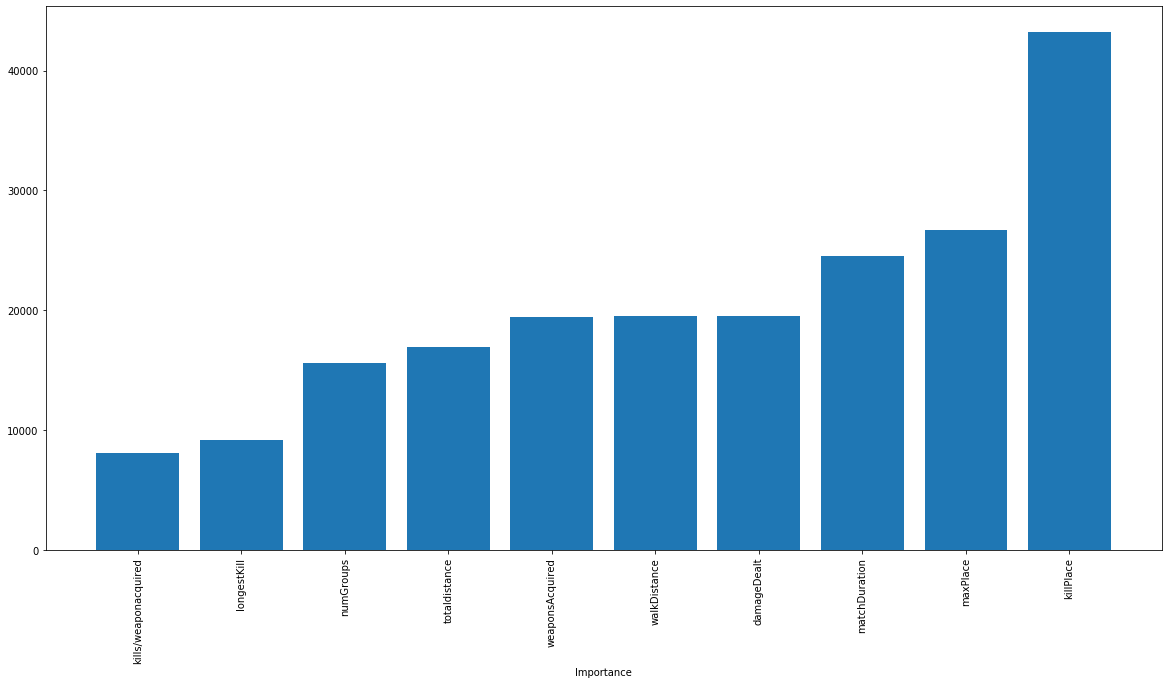

In [80]:
feature_importance = lgb_reg1.feature_importances_
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[len(feature_importance) - 10:]
pos = np.arange(sorted_idx.shape[0]) 

plt.figure(figsize=(20,10))
plt.bar(pos, feature_importance[sorted_idx])
plt.xticks(pos, X.columns[sorted_idx],rotation=90)
plt.xlabel('Importance')
plt.show()